Print All File From OS

In [4]:
import os

folder_path = 'CSV/CSV_All/'

CSV = []

file_names = os.listdir(folder_path)

csv_file_names = [file for file in file_names if file.lower().endswith('.csv')]

for file_name in csv_file_names:
    CSV.append(file_name)

print("共{",len(CSV),"}個檔案")
'''
for i in range(len(CSV)):
    print(f"Route Number: {i:<5} | Route File: {CSV[i]:<20}")'''

共{ 1690 }個檔案


'\nfor i in range(len(CSV)):\n    print(f"Route Number: {i:<5} | Route File: {CSV[i]:<20}")'

Add Value Function(Linear)用不太到

In [2]:
import csv

def Add_Value(csv_file_path):

    data_array = []

    with open(csv_file_path, newline='') as csvfile:
        csv_reader = csv.reader(csvfile)
        for row in csv_reader:
            data_array.append(row)

    Distance = []
    for row in data_array:
        Distance.append(row[0])

    Elevation = []
    for row in data_array:
        Elevation.append(row[1])

    Distance = Distance[1:]
    for i in range(len(Distance)):
        Distance[i] = float(Distance[i])*1000
        Distance[i] = int(Distance[i])

    Elevation = Elevation[1:]
    for i in range(len(Elevation)):
        Elevation[i] = float(Elevation[i])

    Distance_Diff = []
    for i in range(1, len(Distance)):
        Distance_Diff.append(Distance[i] - Distance[i - 1])

    Elevation_Diff = []
    for i in range(1, len(Elevation)):
        Elevation_Diff.append(Elevation[i] - Elevation[i - 1])

    Elevation_Diff_Per = []
    for i in range(len(Elevation_Diff)):
        Elevation_Diff_Per.append(Elevation_Diff[i] / (Distance_Diff[i]+1e-10))

    Distance_Value = []
    Elevation_Value = []
    
    for j in range(len(Distance_Diff)):
        if j == 0:
            start_elevation = Elevation[0]
            start_distance = Distance[0]
        else:
            start_elevation = Elevation[j]
            start_distance = Distance[j]
        
        for i in range(Distance_Diff[j]):
            Elevation_Value.append(start_elevation + Elevation_Diff_Per[j] * i)
            Distance_Value.append(start_distance + i)
            
    Distance_Value.append(Distance[-1])  
    Elevation_Value.append(Elevation[-1])

    return(Distance, Elevation, Distance_Value, Elevation_Value)

Add Value Function(套件)用這個

In [3]:
def Read_Data(csv_file_path):
    data_array = []
    with open(csv_file_path, newline='') as csvfile:
        csv_reader = csv.reader(csvfile)
        next(csv_reader)
        for row in csv_reader:
            data_array.append(row)
                    
    Distance = []
    Elevation = []
    for row in data_array:
        #Distance.append(float(row[0]) * 1000)#單位換算，看Raw Data單位是啥
        Distance.append(float(row[0]))
        Elevation.append(float(row[1]))
    if len(Distance) < 10 or len(Elevation) < 10:
        return [], []
    return Distance, Elevation

def Interp_Data(Distance, Elevation):
    if not Distance:
        return [], []
    x_interp = np.arange(1, int(Distance[-1]) + 1)
    y_interp = np.interp(x_interp, Distance, Elevation)
    '''曲线插值
    cs = CubicSpline(Distance, Elevation)
    y_interp = cs(x_interp)
    '''
    return x_interp, y_interp

Interp by Package

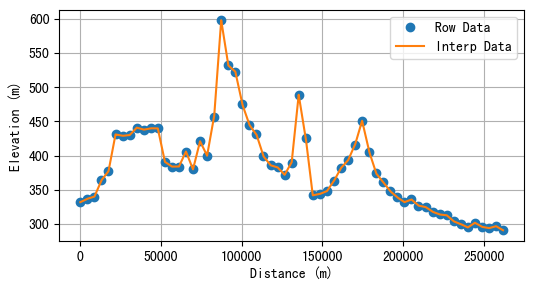

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import csv

Distance, Elevation = Read_Data('CSV/CSV_All/Afghanistan-Afganistan_2365190.csv')
Distance_interp, Elevation_interp = Interp_Data(Distance, Elevation)

plt.figure(figsize=(6,3))
plt.plot(Distance, Elevation, 'o', label='Row Data')
plt.plot(Distance_interp, Elevation_interp, '-', label='Interp Data')
plt.xlabel('Distance (m)')
plt.ylabel('Elevation (m)')
plt.legend()
plt.grid()
plt.show()

Caculate Values Func

In [8]:
def Fundamental(Distance, Elevation):
    if not Distance:
        return [], [], []
    Total_Distance = max(Distance)
    Max_Elevation = max(Elevation)
    Avg_Elevation = np.average(Elevation)
    Total_Distance = f"{Total_Distance:.2f}"
    Max_Elevation = f"{Max_Elevation:.2f}"
    Avg_Elevation = f"{Avg_Elevation:.2f}"
    return Total_Distance, Max_Elevation , Avg_Elevation

def Caculate_Value(Data_):
    if not Data_:
        return [], [], [], [], [], []
    P_Save = []
    P_Check = []
    P_Slope_Trend = []
    P_Slope_Per = []
    Increase_Elevation = []
    Node = []
    N_Save = []
    N_Check = []
    N_Slope_Trend = []
    N_Slope_Per = []
    Decrease_Elevation = []
    for i in range(len(Data_)-1):
        if Data_[i+1] > Data_[i]:
            P_Save.append(Data_[i])
            P_Check.append(i)
            if i == (len(Data_)-2) and Data_[i+1] > Data_[i]:
                P_Save.append(Data_[i+1])
                P_Slope_Trend.append((max(P_Save) - min(P_Save)) / (len(P_Save) - 1))
                for j in range(len(P_Save)-1):
                    P_Slope_Per.append((P_Save[j + 1]-P_Save[j]))
                Increase_Elevation.append(max(P_Save) - min(P_Save))
        if Data_[i+1] < Data_[i] and P_Check:
            P_Save.append(Data_[i])
            Node.append(Data_[i])
            P_Slope_Trend.append((max(P_Save) - min(P_Save)) / (len(P_Save) - 1))
            for j in range(len(P_Save)-1):
                P_Slope_Per.append((P_Save[j + 1]-P_Save[j]))
            Increase_Elevation.append(max(P_Save) - min(P_Save))
            P_Save = []
            P_Check = []
        if Data_[i+1] < Data_[i]:
            N_Save.append(Data_[i])
            N_Check.append(i)
            if i == len(Data_)-2 and Data_[i+1] < Data_[i]:
                N_Save.append(Data_[i+1])
                N_Slope_Trend.append(-(max(N_Save) - min(N_Save)) / (len(N_Save) - 1))
                for j in range(len(N_Save)-1):
                    N_Slope_Per.append((N_Save[j + 1]-N_Save[j]))
                Decrease_Elevation.append(max(N_Save) - min(N_Save))
        if Data_[i+1] > Data_[i] and N_Check:
            N_Save.append(Data_[i])
            Node.append(Data_[i])
            N_Slope_Trend.append(-(max(N_Save) - min(N_Save)) / (len(N_Save) - 1))
            for j in range(len(N_Save)-1):
                N_Slope_Per.append((N_Save[j + 1]-N_Save[j]))
            Decrease_Elevation.append(max(N_Save) - min(N_Save))
            N_Save = []
            N_Check = []
    return P_Slope_Trend, P_Slope_Per, N_Slope_Trend, N_Slope_Per, Increase_Elevation, Decrease_Elevation

def Caculate_Slope(P_Slope_Trend, P_Slope_Per, N_Slope_Trend, N_Slope_Per):
    if not P_Slope_Trend:
        return [], [], [], [], [], [], [], []
    P_Slope_T_AVG = np.average(P_Slope_Trend) if len(P_Slope_Trend) > 0 else 0
    P_Slope_T_MAX = np.max(P_Slope_Trend) if len(P_Slope_Trend) > 0 else 0
    P_Slope_P_AVG = np.average(P_Slope_Per) if len(P_Slope_Per) > 0 else 0
    P_Slope_P_MAX = np.max(P_Slope_Per) if len(P_Slope_Per) > 0 else 0
    
    N_Slope_T_AVG = np.average(N_Slope_Trend) if len(N_Slope_Trend) > 0 else 0
    N_Slope_T_MAX = np.max(N_Slope_Trend) if len(N_Slope_Trend) > 0 else 0
    N_Slope_P_AVG = np.average(N_Slope_Per) if len(N_Slope_Per) > 0 else 0
    N_Slope_P_MAX = np.max(N_Slope_Per) if len(N_Slope_Per) > 0 else 0
    
    P_Slope_T_AVG = f"{P_Slope_T_AVG * 100:.2f}"
    P_Slope_T_MAX = f"{P_Slope_T_MAX * 100:.2f}"
    P_Slope_P_AVG = f"{P_Slope_P_AVG * 100:.2f}"
    P_Slope_P_MAX = f"{P_Slope_P_MAX * 100:.2f}"
    N_Slope_T_AVG = f"{N_Slope_T_AVG * 100:.2f}"
    N_Slope_T_MAX = f"{N_Slope_T_MAX * 100:.2f}"
    N_Slope_P_AVG = f"{N_Slope_P_AVG * 100:.2f}"
    N_Slope_P_MAX = f"{N_Slope_P_MAX * 100:.2f}"

    return P_Slope_T_AVG, P_Slope_T_MAX, P_Slope_P_AVG, P_Slope_P_MAX, \
           N_Slope_T_AVG, N_Slope_T_MAX, N_Slope_P_AVG, N_Slope_P_MAX

def Caculate_Crease(Increase_Elevation, Decrease_Elevation):
    if not Increase_Elevation:
        return [], [], [], [], [], []
    Total_In_Ele = sum(Increase_Elevation) if Increase_Elevation else 0
    Max_In_Ele = max(Increase_Elevation) if Increase_Elevation else 0
    Avg_In_Ele = np.average(Increase_Elevation) if Increase_Elevation else 0
    
    Total_De_Ele = sum(Decrease_Elevation) if Decrease_Elevation else 0
    Max_De_Ele = max(Decrease_Elevation) if Decrease_Elevation else 0
    Avg_De_Ele = np.average(Decrease_Elevation) if Decrease_Elevation else 0
    
    Total_In_Ele = f"{Total_In_Ele:.2f}"
    Max_In_Ele = f"{Max_In_Ele:.2f}"
    Avg_In_Ele = f"{Avg_In_Ele:.2f}"
    Total_De_Ele = f"{Total_De_Ele:.2f}"
    Max_De_Ele = f"{Max_De_Ele:.2f}"
    Avg_De_Ele = f"{Avg_De_Ele:.2f}"
    return Total_In_Ele, Max_In_Ele, Avg_In_Ele, Total_De_Ele, Max_De_Ele, Avg_De_Ele

def PN_Persent(Data_):
    if not Data_:
        return [], []
    P_Save = []
    P_Check = []
    P_Persent = []
    N_Save = []
    N_Check = []
    N_Persent = []
    for i in range(len(Data_)-1):
        if Data_[i+1] > Data_[i]:
            P_Save.append(Data_[i])
            P_Check = 1
            if i == len(Data_)-2 and Data_[i+1] > Data_[i]:
                P_Save.append(Data_[i+1])
        if Data_[i+1] < Data_[i] and P_Check:
            P_Save.append(Data_[i])
            P_Check = []
        if Data_[i+1] < Data_[i]:
            N_Save.append(Data_[i])
            N_Check = 1
            if i == len(Data_)-2 and Data_[i+1] < Data_[i]:
                N_Save.append(Data_[i+1])
                N = 1
        if Data_[i+1] > Data_[i] and N_Check:
            N_Save.append(Data_[i])
            N_Check = []
    P_Persent = len(P_Save) / len(Data_) * 100
    N_Persent = len(N_Save) / len(Data_) * 100

    P_Persent = f"{P_Persent:.2f}"
    N_Persent = f"{N_Persent:.2f}"
    return P_Persent, N_Persent

def ROC_Caculate(Data_, N):
    if not Data_:
        return []
    ROC = []
    for i in range(N, len(Data_)):
        if Data_[i] != 0:
            ROC.append((Data_[i-N] - Data_[i]) / Data_[i] * 100)
    ROC_AVG = np.average(ROC)
    ROC_AVG = f"{ROC_AVG:.2f}"
    return ROC_AVG

檢查並設定資料夾

In [ ]:
import os
import pandas as pd

CSVPATH = "CSV/CSV_All/"

CSV = os.listdir(CSVPATH)

long_files = []

for file in CSV:
    file_path = os.path.join(CSVPATH, file)
    try:
        df = pd.read_csv(file_path)
        if len(df) > 10:
            long_files.append(file)
    except Exception as e:
        print(f"Error reading {file}: {e}")

print("Files with more than 10 rows:")

print(len(long_files))

for file in long_files:
    print(file)

ALL

In [ ]:
import csv
import os
import numpy as np

folder_path = CSVPATH
CSV = [file for file in os.listdir(folder_path) if file.lower().endswith('.csv')]

def Read_Data(csv_file_path):
    data_array = []
    with open(csv_file_path, newline='') as csvfile:
        csv_reader = csv.reader(csvfile)
        next(csv_reader)
        for row in csv_reader:
            data_array.append(row)
                    
    Distance = []
    Elevation = []
    for row in data_array:
        Distance.append(float(row[0]))
        Elevation.append(float(row[1]))
    if len(Distance) < 10 or len(Elevation) < 10:
        return [], []
    return Distance, Elevation

def Interp_Data(Distance, Elevation):
    if len(Distance) == 0:
        return [], []
    x_interp = np.arange(1, int(Distance[-1]) + 1)
    y_interp = np.interp(x_interp, Distance, Elevation)
    return x_interp, y_interp

def Fundamental(Distance, Elevation):
    if len(Distance) == 0:
        return [], [], []
    Total_Distance = max(Distance)
    Max_Elevation = max(Elevation)
    Avg_Elevation = np.mean(Elevation)
    Total_Distance = f"{Total_Distance:.2f}"
    Max_Elevation = f"{Max_Elevation:.2f}"
    Avg_Elevation = f"{Avg_Elevation:.2f}"
    return Total_Distance, Max_Elevation, Avg_Elevation

def Caculate_Value(Data_):
    if len(Data_) == 0:
        return [], [], [], [], [], []
    P_Save = []
    P_Check = []
    P_Slope_Trend = []
    P_Slope_Per = []
    Increase_Elevation = []
    Node = []
    N_Save = []
    N_Check = []
    N_Slope_Trend = []
    N_Slope_Per = []
    Decrease_Elevation = []
    for i in range(len(Data_)-1):
        if Data_[i+1] > Data_[i]:
            P_Save.append(Data_[i])
            P_Check.append(i)
            if i == (len(Data_)-2) and Data_[i+1] > Data_[i]:
                P_Save.append(Data_[i+1])
                P_Slope_Trend.append((max(P_Save) - min(P_Save)) / (len(P_Save) - 1))
                for j in range(len(P_Save)-1):
                    P_Slope_Per.append((P_Save[j + 1]-P_Save[j]))
                Increase_Elevation.append(max(P_Save) - min(P_Save))
        if Data_[i+1] < Data_[i] and P_Check:
            P_Save.append(Data_[i])
            Node.append(Data_[i])
            P_Slope_Trend.append((max(P_Save) - min(P_Save)) / (len(P_Save) - 1))
            for j in range(len(P_Save)-1):
                P_Slope_Per.append((P_Save[j + 1]-P_Save[j]))
            Increase_Elevation.append(max(P_Save) - min(P_Save))
            P_Save = []
            P_Check = []
        if Data_[i+1] < Data_[i]:
            N_Save.append(Data_[i])
            N_Check.append(i)
            if i == len(Data_)-2 and Data_[i+1] < Data_[i]:
                N_Save.append(Data_[i+1])
                N_Slope_Trend.append(-(max(N_Save) - min(N_Save)) / (len(N_Save) - 1))
                for j in range(len(N_Save)-1):
                    N_Slope_Per.append((N_Save[j + 1]-N_Save[j]))
                Decrease_Elevation.append(max(N_Save) - min(N_Save))
        if Data_[i+1] > Data_[i] and N_Check:
            N_Save.append(Data_[i])
            Node.append(Data_[i])
            N_Slope_Trend.append(-(max(N_Save) - min(N_Save)) / (len(N_Save) - 1))
            for j in range(len(N_Save)-1):
                N_Slope_Per.append((N_Save[j + 1]-N_Save[j]))
            Decrease_Elevation.append(max(N_Save) - min(N_Save))
            N_Save = []
            N_Check = []
    return P_Slope_Trend, P_Slope_Per, N_Slope_Trend, N_Slope_Per, Increase_Elevation, Decrease_Elevation

def Caculate_Slope(P_Slope_Trend, P_Slope_Per, N_Slope_Trend, N_Slope_Per):
    if len(P_Slope_Trend) == 0:
        return [], [], [], [], [], [], [], []
    P_Slope_T_AVG = np.average(P_Slope_Trend) if len(P_Slope_Trend) > 0 else 0
    P_Slope_T_MAX = np.max(P_Slope_Trend) if len(P_Slope_Trend) > 0 else 0
    P_Slope_P_AVG = np.average(P_Slope_Per) if len(P_Slope_Per) > 0 else 0
    P_Slope_P_MAX = np.max(P_Slope_Per) if len(P_Slope_Per) > 0 else 0
    
    N_Slope_T_AVG = np.average(N_Slope_Trend) if len(N_Slope_Trend) > 0 else 0
    N_Slope_T_MAX = np.max(N_Slope_Trend) if len(N_Slope_Trend) > 0 else 0
    N_Slope_P_AVG = np.average(N_Slope_Per) if len(N_Slope_Per) > 0 else 0
    N_Slope_P_MAX = np.max(N_Slope_Per) if len(N_Slope_Per) > 0 else 0
    
    P_Slope_T_AVG = f"{P_Slope_T_AVG * 100:.2f}"
    P_Slope_T_MAX = f"{P_Slope_T_MAX * 100:.2f}"
    P_Slope_P_AVG = f"{P_Slope_P_AVG * 100:.2f}"
    P_Slope_P_MAX = f"{P_Slope_P_MAX * 100:.2f}"
    N_Slope_T_AVG = f"{N_Slope_T_AVG * 100:.2f}"
    N_Slope_T_MAX = f"{N_Slope_T_MAX * 100:.2f}"
    N_Slope_P_AVG = f"{N_Slope_P_AVG * 100:.2f}"
    N_Slope_P_MAX = f"{N_Slope_P_MAX * 100:.2f}"

    return P_Slope_T_AVG, P_Slope_T_MAX, P_Slope_P_AVG, P_Slope_P_MAX, \
           N_Slope_T_AVG, N_Slope_T_MAX, N_Slope_P_AVG, N_Slope_P_MAX

def Caculate_Crease(Increase_Elevation, Decrease_Elevation):
    if len(Increase_Elevation) == 0:
        return [], [], [], [], [], []
    Total_In_Ele = sum(Increase_Elevation) if Increase_Elevation else 0
    Max_In_Ele = max(Increase_Elevation) if Increase_Elevation else 0
    Avg_In_Ele = np.average(Increase_Elevation) if Increase_Elevation else 0
    
    Total_De_Ele = sum(Decrease_Elevation) if Decrease_Elevation else 0
    Max_De_Ele = max(Decrease_Elevation) if Decrease_Elevation else 0
    Avg_De_Ele = np.average(Decrease_Elevation) if Decrease_Elevation else 0
    
    Total_In_Ele = f"{Total_In_Ele:.2f}"
    Max_In_Ele = f"{Max_In_Ele:.2f}"
    Avg_In_Ele = f"{Avg_In_Ele:.2f}"
    Total_De_Ele = f"{Total_De_Ele:.2f}"
    Max_De_Ele = f"{Max_De_Ele:.2f}"
    Avg_De_Ele = f"{Avg_De_Ele:.2f}"
    return Total_In_Ele, Max_In_Ele, Avg_In_Ele, Total_De_Ele, Max_De_Ele, Avg_De_Ele

def PN_Persent(Data_):
    if len(Data_) == 0:
        return [], []
    P_Save = []
    P_Check = []
    P_Persent = []
    N_Save = []
    N_Check = []
    N_Persent = []
    for i in range(len(Data_)-1):
        if Data_[i+1] > Data_[i]:
            P_Save.append(Data_[i])
            P_Check = 1
            if i == len(Data_)-2 and Data_[i+1] > Data_[i]:
                P_Save.append(Data_[i+1])
        if Data_[i+1] < Data_[i] and P_Check:
            P_Save.append(Data_[i])
            P_Check = []
        if Data_[i+1] < Data_[i]:
            N_Save.append(Data_[i])
            N_Check = 1
            if i == len(Data_)-2 and Data_[i+1] < Data_[i]:
                N_Save.append(Data_[i+1])
                N = 1
        if Data_[i+1] > Data_[i] and N_Check:
            N_Save.append(Data_[i])
            N_Check = []
    P_Persent = len(P_Save) / len(Data_) * 100
    N_Persent = len(N_Save) / len(Data_) * 100

    P_Persent = f"{P_Persent:.2f}"
    N_Persent = f"{N_Persent:.2f}"
    return P_Persent, N_Persent

def ROC_Caculate(Data_, N):
    if len(Data_) == 0:
        return []
    ROC = []
    for i in range(N, len(Data_)):
        if Data_[i] != 0:
            ROC.append((Data_[i-N] - Data_[i]) / Data_[i] * 100)
    ROC_AVG = np.average(ROC)
    ROC_AVG = f"{ROC_AVG:.2f}"
    return ROC_AVG
    
def Save_Data(File_Name):
    Distance, Elevation = Read_Data(f'{CSVPATH}/{File_Name}')
    if len(Distance) == 0:
        return []
    else:
        Distance_interp, Elevation_interp = Interp_Data(Distance, Elevation)
        Total_Di, Max_El, Avg_El = Fundamental(Distance_interp, Elevation_interp)
        P_S_T, P_S_P, N_S_T, N_S_P, In_El, De_El = Caculate_Value(Elevation_interp)
        P_S_T_Avg, P_S_T_Max, P_S_P_Avg, P_S_P_Max, N_S_T_Avg, N_S_T_Max, N_S_P_Avg, N_S_P_Max = Caculate_Slope(P_S_T, P_S_P, N_S_T, N_S_P)
        Total_In_El, Max_In_El, Avg_In_El, Total_De_El, Max_De_El, Avg_De_El = Caculate_Crease(In_El, De_El)
        P_Persent, N_Persent = PN_Persent(Elevation_interp)
        ROC_Avg = ROC_Caculate(Elevation_interp, int(len(Elevation_interp) / 10))
        
        output_file = 'Test.csv'
        fieldnames = [
            "File_Name","總騎乘長度", "最高海拔", "平均海拔",
            "爬升坡率平均(趨勢)", "最大爬升坡率(趨勢)",
            "爬升坡率平均(Per)", "最大爬升坡率(Per)",
            "下降坡率平均(趨勢)", "最大下降坡率(趨勢)",
            "下降坡率平均(Per)", "最大下降坡率(Per)",
            "總爬升海拔", "最大爬升海拔", "平均爬升海拔",
            "總下降海拔", "最大下降海拔", "平均下降海拔",
            "爬升路段比例", "下降路段比例", "平均路徑變化率"
        ]
        
        write_header = not os.path.exists(output_file)
        with open(output_file, 'a', newline='') as csvfile:
            csv_writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            if write_header:
                csv_writer.writeheader()
            csv_writer.writerow({
                "File_Name": File_Name,
                "總騎乘長度": Total_Di,
                "最高海拔": Max_El,
                "平均海拔": Avg_El,
                "爬升坡率平均(趨勢)": P_S_T_Avg,
                "最大爬升坡率(趨勢)": P_S_T_Max,
                "爬升坡率平均(Per)": P_S_P_Avg,
                "最大爬升坡率(Per)": P_S_P_Max,
                "下降坡率平均(趨勢)": N_S_T_Avg,
                "最大下降坡率(趨勢)": N_S_T_Max,
                "下降坡率平均(Per)": N_S_P_Avg,
                "最大下降坡率(Per)": N_S_P_Max,
                "總爬升海拔": Total_In_El,
                "最大爬升海拔": Max_In_El,
                "平均爬升海拔": Avg_In_El,
                "總下降海拔": Total_De_El,
                "最大下降海拔": Max_De_El,
                "平均下降海拔": Avg_De_El,
                "爬升路段比例": P_Persent,
                "下降路段比例": N_Persent,
                "平均路徑變化率": ROC_Avg
            })
        return f"Finish Caculate {File_Name}"

for i in range(len(long_files)):
    result = Save_Data(f'{long_files[i]}')
    print(result)